In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [133]:
G = 4.299e-6

e = 0.9
a = 10./(1-e)

m = np.array([5e11, 1e5])

mu = G *(m[0]+m[1])
n = np.sqrt(mu/a**3)

vp = n * a * np.sqrt((1+e)/(1-e))
# vp=0.
print vp

639.065788226


In [134]:
T = 2*pi/n
print T

4.28559473878


In [135]:
pos = np.array([[0.,0.,0.],[10.,0.,0.]])

vel = np.array([[0.,0.,0.],[0.,vp,0.]])


In [136]:
print pos

[[  0.   0.   0.]
 [ 10.   0.   0.]]


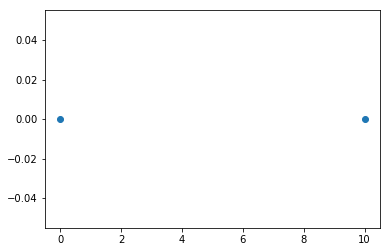

In [137]:
plt.plot(pos[:,0],pos[:,1],'o')

In [138]:
import aceleraciones as ac
eps = 0.5
acel = ac.aceleraciones(eps,pos[:,0],pos[:,1],pos[:,2],m)

In [139]:
print acel

[[  4.28292898e-03   0.00000000e+00   0.00000000e+00]
 [ -2.14146449e+04   0.00000000e+00   0.00000000e+00]]


In [148]:
dt = 0.001
nit = 10000
eps=0.5

# EULER

In [155]:
import euler

posf,velf,acf = euler.euler(eps,dt,nit,m,pos,vel,acel)

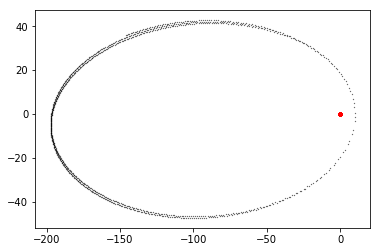

In [156]:
path = '/home/omarioni/metodos_numericos/_data/P2C/euler/'
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    plt.plot(posf[1,0],posf[1,1],'.k', markersize=0.5)
    plt.plot(posf[0,0],posf[0,1],'.r')

In [70]:
pos, posf

(array([[  0.,   0.,   0.],
        [ 10.,   0.,   0.]]),
 array([[  3.00000000e-06,   9.10000000e-05,   0.00000000e+00],
        [ -4.24375900e+00,   9.09868600e+00,   0.00000000e+00]]))

In [157]:
import energia_potencial as ep
Uff = np.zeros(nit/10)
Kff = np.zeros(nit/10)
path = '/home/omarioni/metodos_numericos/_data/P2C/euler/'
k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf= 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    Uff[k] = np.sum(Uf,axis=0)
    Kff[k] = np.sum(Kf,axis=0)
    k += 1
    
Ef = Kff - 0.5*Uff
# print len(Uf)
#     print Uf, Kf

In [158]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[0])/abs(Ef[0])

# print dE

time = dt*np.arange(5,nit-5,10)

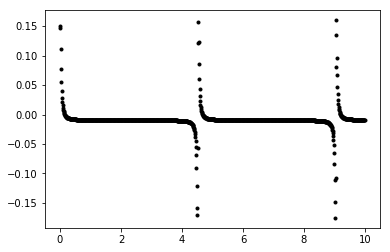

In [159]:
plt.plot(time,dE,'.k')

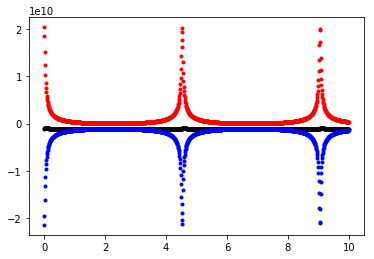

In [160]:
time = dt*np.arange(0,nit,10)

plt.plot(time,Ef,'.k')
plt.plot(time,Kff,'.r')
plt.plot(time,-0.5*Uff,'.b')

# RUNGE

In [162]:
import runge
    
posf,velf,acf = runge.rungek(eps,dt,nit,m,pos,vel,acel)

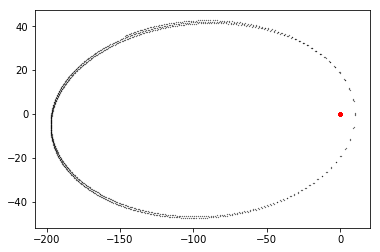

In [163]:
path = '/home/omarioni/metodos_numericos/_data/P2C/runge/'
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    plt.plot(posf[1,0],posf[1,1],'.k', markersize=0.5)
    plt.plot(posf[0,0],posf[0,1],'.r')

In [164]:
import energia_potencial as ep
Uff = np.zeros(nit/10)
Kff = np.zeros(nit/10)
path = '/home/omarioni/metodos_numericos/_data/P2C/runge/'
k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf= 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    Uff[k] = np.sum(Uf,axis=0)
    Kff[k] = np.sum(Kf,axis=0)
    k += 1
    
Ef = Kff - 0.5*Uff
# print len(Uf)
#     print Uf, Kf

In [165]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[0])/abs(Ef[0])

# print dE

time = dt*np.arange(5,nit-5,10)
# time = dt*np.arange(0,nit,10)

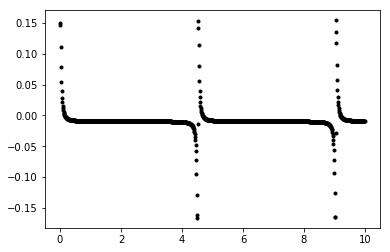

In [166]:
plt.plot(time,dE,'.k')
# plt.ylim(-1,1)

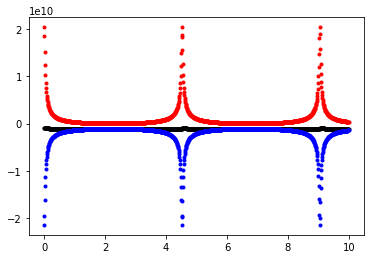

In [167]:
time = dt*np.arange(0,nit,10)

plt.plot(time,Ef,'.k')
plt.plot(time,Kff,'.r')
plt.plot(time,-0.5*Uff,'.b')

# LEAPFROG -KDK

In [149]:
import LF 
    
posf,velf,acf = LF.KDK(eps,dt,nit,m,pos,vel,acel)

In [142]:
print pos, posf

[[  0.   0.   0.]
 [ 10.   0.   0.]] [[  3.19122609e-05   1.20381993e-04   0.00000000e+00]
 [ -1.49561304e+02   3.71558229e+01   0.00000000e+00]]


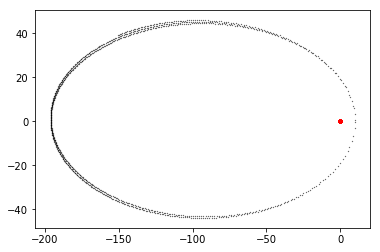

In [150]:
path = '/home/omarioni/metodos_numericos/_data/P2C/KDK/'
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    plt.plot(posf[1,0],posf[1,1],'.k', markersize=0.5)
    plt.plot(posf[0,0],posf[0,1],'.r')

In [151]:
import energia_potencial as ep
Uff = np.zeros(nit/10)
Kff = np.zeros(nit/10)
path = '/home/omarioni/metodos_numericos/_data/P2C/KDK/'
k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf= 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    Uff[k] = np.sum(Uf,axis=0)
    Kff[k] = np.sum(Kf,axis=0)
    k += 1
    
Ef = Kff - 0.5*Uff
# print len(Uf)
#     print Uf, Kf

In [152]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[0])/abs(Ef[0])

# print dE

time = dt*np.arange(5,nit-5,10)
# time = dt*np.arange(0,nit,10)

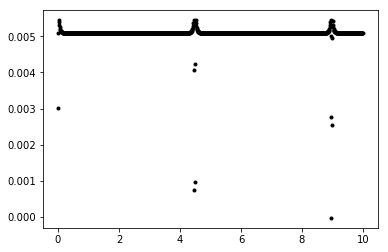

In [153]:
plt.plot(time,dE,'.k')

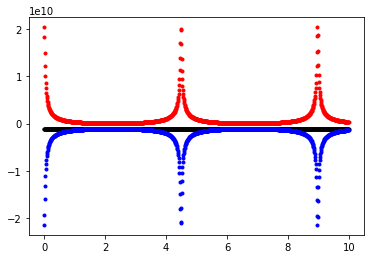

In [154]:
time = dt*np.arange(0,nit,10)

plt.plot(time,Ef,'.k')
plt.plot(time,Kff,'.r')
plt.plot(time,-0.5*Uff,'.b')

# LEAPFROG -DKD

In [168]:
import LF 
    
posf,velf,acf = LF.DKD(eps,dt,nit,m,pos,vel,acel)

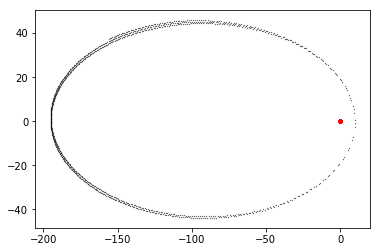

In [169]:
path = '/home/omarioni/metodos_numericos/_data/P2C/DKD/'
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
#     velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    plt.plot(posf[1,0],posf[1,1],'.k', markersize=0.5)
    plt.plot(posf[0,0],posf[0,1],'.r')

In [170]:
import energia_potencial as ep
Uff = np.zeros(nit/10)
Kff = np.zeros(nit/10)
path = '/home/omarioni/metodos_numericos/_data/P2C/DKD/'
k=0
for i in np.arange(0,nit,10):
    posf = np.loadtxt(path+'posiciones'+str('%s'%i)+'.dat')
    velf = np.loadtxt(path+'velocidades'+str('%s'%i)+'.dat')
    
    Uf = ep.epot(eps,posf[:,0],posf[:,1],posf[:,2],m)
    Kf= 0.5*m*(velf[:,0]**2 + velf[:,1]**2 + velf[:,2]**2)

    Uff[k] = np.sum(Uf,axis=0)
    Kff[k] = np.sum(Kf,axis=0)
    k += 1
    
Ef = Kff - 0.5*Uff
# print len(Uf)
#     print Uf, Kf

In [171]:
dE = np.zeros(len(Ef)-1)

for i in np.arange(len(Ef)-1):
    dE[i] = (Ef[i+1] - Ef[0])/abs(Ef[0])

# print dE

time = dt*np.arange(5,nit-5,10)
# time = dt*np.arange(0,nit,10)

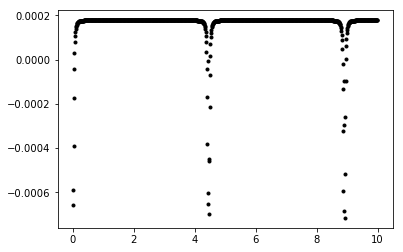

In [172]:
plt.plot(time,dE,'.k')

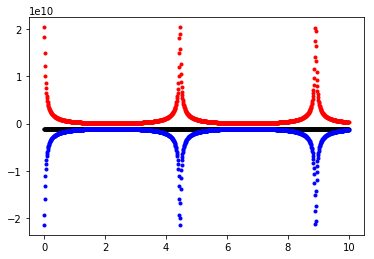

In [173]:
time = dt*np.arange(0,nit,10)

plt.plot(time,Ef,'.k')
plt.plot(time,Kff,'.r')
plt.plot(time,-0.5*Uff,'.b')